In [4]:
# Imports et chemin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Vue d'ensemble des données
print("Shape:", df.shape)
display(df.sample(5))
df.info()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1650,3049-NDXFL,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,85.80,85.8,Yes
3590,9447-YPTBX,Female,0,Yes,No,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.85,943.1,No
2282,1587-FKLZB,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.50,6822.15,Yes
3239,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799,No
3189,5384-ZTTWP,Female,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.80,272.95,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Ciblage de la variable churn et baseline
df["Churn"].value_counts(dropna=False)

churn_rate = (df["Churn"] == "Yes").mean()
print(f"Churn rate: {churn_rate:.2%}")
print(f"Baseline accuracy (predict 'No' for everyone): {(1-churn_rate):.2%}")



Churn rate: 26.54%
Baseline accuracy (predict 'No' for everyone): 73.46%


In [4]:
#Valeurs manquantes
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: float64)

In [5]:
# Nettoyage du piège
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()


np.int64(11)

In [6]:
# Convertir la variable cible en binaire
df["ChurnFlag"] = (df["Churn"] == "Yes").astype(int)
df[["Churn", "ChurnFlag"]].head()


,Churn,ChurnFlag
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [7]:
#Check des doublons + ID inutile
print("Duplicates:", df.duplicated().sum())
print("customerID unique:", df["customerID"].nunique(), "/", len(df))


Duplicates: 0
customerID unique: 7043 / 7043


In [8]:
# Aperçu des colonnes numériques et catégorielles
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("Numeric cols:", num_cols)
print("Categorical cols (sample):", cat_cols[:15], "...")


Numeric cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnFlag']
Categorical cols (sample): ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'] ...


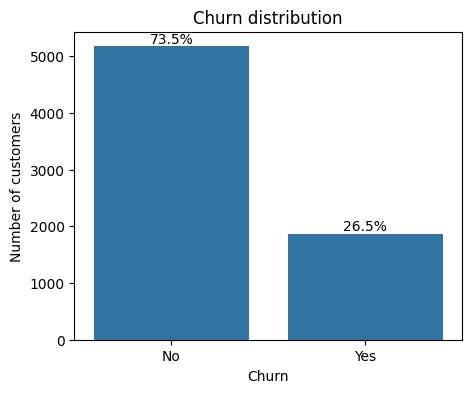

In [5]:
# Countplot
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Churn', data=df)

# Ajout des pourcentages sur les barres
total = len(df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()


In [7]:
# The dataset is imbalanced, with around 26–27% churned customers.
# This imbalance justifies the use of recall-oriented metrics and class weighting during model training.

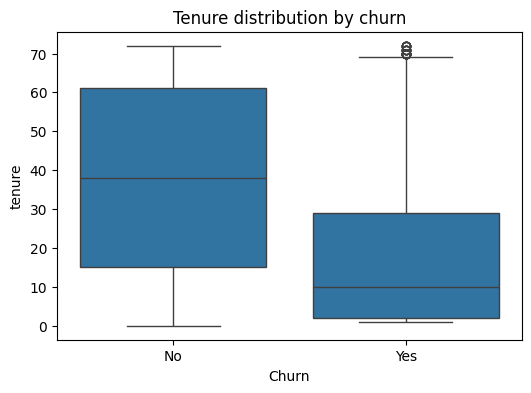

In [8]:
# Churn vs tenure
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure distribution by churn")
plt.show()


In [9]:
# Customers tend to churn early in their lifecycle, highlighting the importance of early engagement and onboarding strategies.

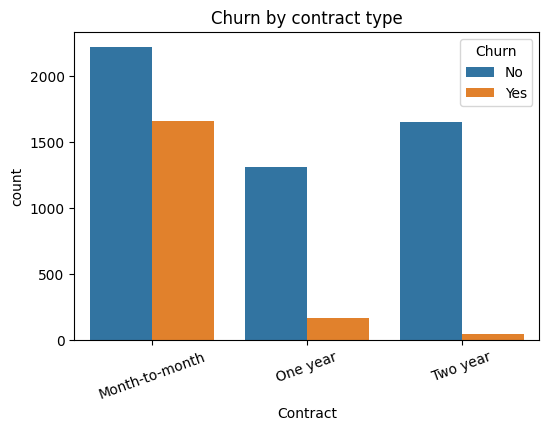

In [10]:
# Churn vs Contract
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by contract type")
plt.xticks(rotation=20)
plt.show()


In [11]:
# Customers on month-to-month contracts exhibit significantly higher churn rates compared to long-term contracts.

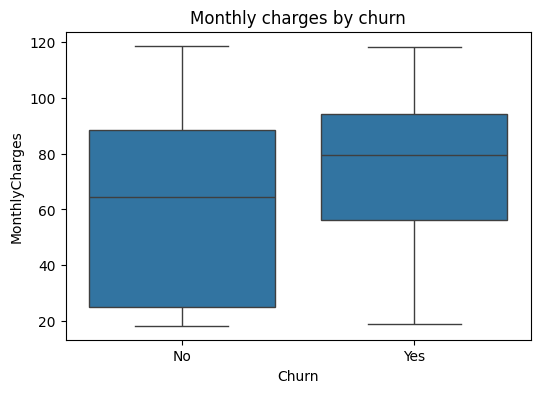

In [12]:
# Churn vs MonthlyCharges
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly charges by churn")
plt.show()

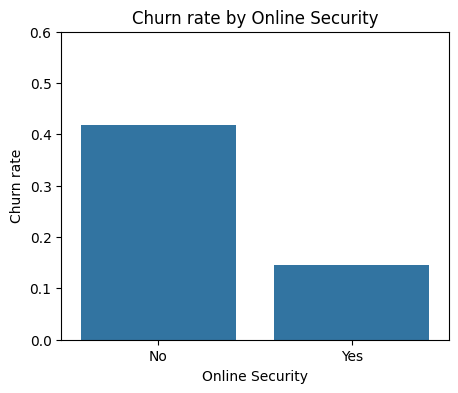

In [17]:
# Churn vs services
df_sec = df[df["OnlineSecurity"] != "No internet service"]

churn_rate = (
    df_sec
    .groupby("OnlineSecurity")["Churn"]
    .apply(lambda x: (x == "Yes").mean())
    .reset_index(name="ChurnRate")
)

plt.figure(figsize=(5,4))
sns.barplot(
    x="OnlineSecurity",
    y="ChurnRate",
    data=churn_rate
)

plt.title("Churn rate by Online Security")
plt.ylabel("Churn rate")
plt.xlabel("Online Security")
plt.ylim(0, 0.6)
plt.show()

In [18]:
# Customers without online security are more likely to churn, indicating the value placed on security features.

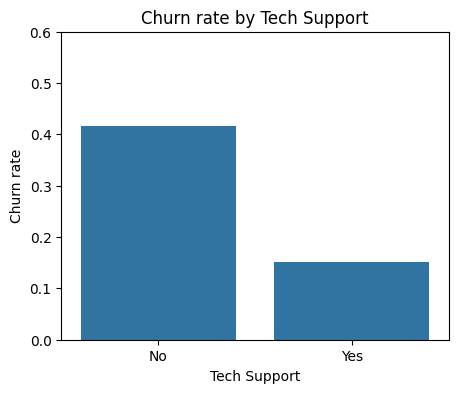

In [19]:
df_ts = df[df["TechSupport"] != "No internet service"]

tech_churn_rate = (
    df_ts
    .groupby("TechSupport")["Churn"]
    .apply(lambda x: (x == "Yes").mean())
    .reset_index(name="ChurnRate")
)

tech_churn_rate

plt.figure(figsize=(5,4))
sns.barplot(
    x="TechSupport",
    y="ChurnRate",
    data=tech_churn_rate
)

plt.title("Churn rate by Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Churn rate")
plt.ylim(0, 0.6)
plt.show()

In [20]:
# Customers without technical support services show a significantly higher churn rate.
# Technical support appears to be a strong retention factor.

Missing TotalCharges: 11


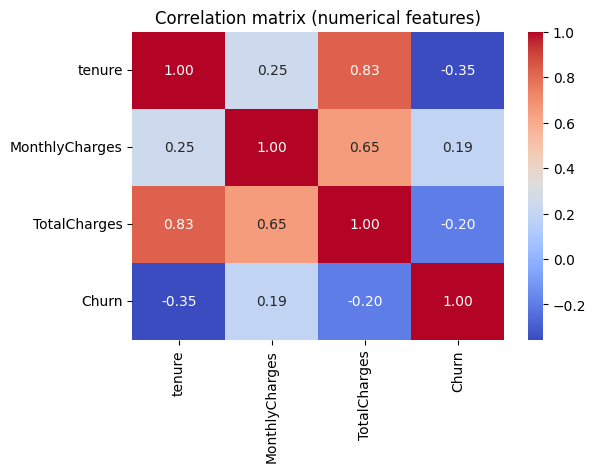

In [22]:
# Matrice de corrélation

df_corr = df.copy()

# 1) Encodage temporaire de Churn
df_corr["Churn"] = df_corr["Churn"].map({"No": 0, "Yes": 1})

# 2) Nettoyage + conversion TotalCharges (les ' ' deviennent NaN)
df_corr["TotalCharges"] = pd.to_numeric(df_corr["TotalCharges"].astype(str).str.strip(), errors="coerce")

# (option) vérifier combien de NaN on a
print("Missing TotalCharges:", df_corr["TotalCharges"].isna().sum())

# 3) Calcul corrélation en dropant les lignes où TotalCharges est NaN
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
corr = df_corr[num_cols].dropna().corr()

# 4) Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (numerical features)")
plt.show()


In [23]:
# TotalCharges contains blank strings for new customers (e.g., tenure close to 0).
# We convert it to numeric and drop missing values for correlation analysis.

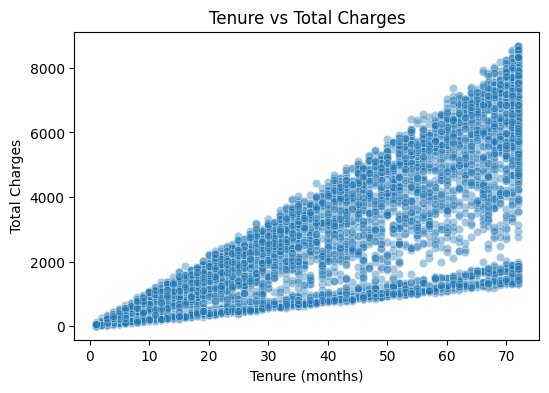

In [24]:
df_scatter = df.copy()

# Conversion propre
df_scatter["TotalCharges"] = pd.to_numeric(
    df_scatter["TotalCharges"].astype(str).str.strip(),
    errors="coerce"
)

# Plot
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_scatter,
    x="tenure",
    y="TotalCharges",
    alpha=0.4
)

plt.title("Tenure vs Total Charges")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges")
plt.show()

In [27]:
# TotalCharges increases almost linearly with tenure, confirming a strong dependency between the two variables.
# This suggests potential feature redundancy, which should be considered during modeling


# **Exploratory Data Analysis — Summary**

### Dataset Overview

* Binary churn prediction problem
* Target variable: Churn (Yes / No)
* Dataset is imbalanced (~26–27% churn)
* Mix of numerical and categorical features

### Key Insights

#### Customer Lifecycle

* Churn is concentrated among new customers
* Customers with low tenure are significantly more likely to churn
* Customer retention is strongly linked to early engagement

#### Contract & Pricing

* Month-to-month contracts exhibit the highest churn rates
* Long-term contracts act as a natural retention mechanism
* Higher MonthlyCharges are associated with increased churn risk
* Price sensitivity is amplified when combined with short-term contracts

#### Value-Added Services

* Customers without OnlineSecurity have a much higher churn rate
* Customers without TechSupport are also more likely to churn
* Value-added services behave as strong retention levers

#### Feature Relationships

* TotalCharges is highly correlated with tenure
* This suggests feature redundancy, but not necessarily feature removal
* Correlations with churn remain moderate, indicating non-linear effects

#### Data Quality & Risks

* TotalCharges contains blank values for new customers
* Target imbalance requires careful metric selection
* Categorical variables dominate the feature space

#### Modeling Implications

* Recall should be prioritized over accuracy
* Class imbalance must be handled (e.g. class weighting)
* Tree-based models are well suited to capture interactions
* Feature engineering and proper encoding are critical

### Next Steps

* Feature engineering (encoding, cleaning, transformations)
* Build a robust preprocessing + modeling pipeline
* Train and evaluate models with recall-oriented metrics